# Comprehensive Comparision

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

In [267]:
df = pd.read_csv('dataset_comb.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [268]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [269]:
df.values.shape

(18185, 12)

In [270]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [284]:
X = df.values[:,1:-1]
Y = df.values[:,-1]

In [272]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

### Fisher Linear Discriminant 

In [302]:
#pipe = Pipeline([('scaler', MinMaxScaler()), ('fda', LinearDiscriminantAnalysis())]) #scaling not required
fda_scores = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(fda_scores['test_score'],fda_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)
    
print("\nAverage test accuracy= ",np.average(fda_scores['test_score']),"\n")

fda_prec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='precision')
for i,score in enumerate(fda_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
fda_rec = cross_validate(LinearDiscriminantAnalysis(),X,Y,cv=7,scoring='recall')
for i,score in enumerate(fda_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.8598922247882987  Training Accuracy =  0.9910181561557708
Fold  2
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9861422980689035
Fold  3
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9851799576570219
Fold  4
Testing Accuracy =  0.9984603541185527  Training Accuracy =  0.9847950214922692
Fold  5
Testing Accuracy =  0.9980754426481909  Training Accuracy =  0.9840893051902226
Fold  6
Testing Accuracy =  0.993841416474211  Training Accuracy =  0.9841534612176814
Fold  7
Testing Accuracy =  0.9068155564112438  Training Accuracy =  0.9967282525019245

Average test accuracy=  0.9651328942899161 

Precision over fold  1  =  1.0
Precision over fold  2  =  0.9992992291520673
Precision over fold  3  =  0.9992997198879552
Precision over fold  4  =  0.9972027972027973
Precision over fold  5  =  0.9965059399021663
Precision over fold  6  =  0.9889042995839112
Precision over fold  7  =  0.854916067146283


Recall over fold  1  =  0.74491

### Linear Perceptron 

In [276]:
pipeLP = Pipeline([('scaler', StandardScaler()), ('per', Perceptron())])  #or use MinMaxScaler
per_scores = cross_validate(pipeLP,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(per_scores['test_score'],per_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(per_scores['test_score']),"\n")

per_prec = cross_validate(pipeLP,X,Y,cv=7,scoring='precision')
for i,score in enumerate(per_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
per_rec = cross_validate(pipeLP,X,Y,cv=7,scoring='recall')
for i,score in enumerate(per_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.5969976905311778  Training Accuracy =  0.9974337589016488
Fold  2
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9769679861422981
Fold  3
Testing Accuracy =  0.9846035411855273  Training Accuracy =  0.9722845961378072
Fold  4
Testing Accuracy =  1.0  Training Accuracy =  0.9867197023160326
Fold  5
Testing Accuracy =  1.0  Training Accuracy =  0.9831911208057997
Fold  6
Testing Accuracy =  0.99153194765204  Training Accuracy =  0.9803040995701546
Fold  7
Testing Accuracy =  0.9306892568348094  Training Accuracy =  0.9961508852963818

Average test accuracy=  0.9290075161804044 

Precision over fold  1  =  1.0
Precision over fold  2  =  1.0
Precision over fold  3  =  0.9894142554693014
Precision over fold  4  =  1.0
Precision over fold  5  =  1.0
Precision over fold  6  =  0.9848066298342542
Precision over fold  7  =  0.887920298879203


Recall over fold  1  =  0.2662929222144359
Recall over fold  2  =  0.9985984583041345
Recall over fold  3  

### Naive Bayes 

In [292]:
pipe = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())]) #scaling not required i think
nb_scores = cross_validate(GaussianNB(),X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nb_scores['test_score'],nb_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(nb_scores['test_score']),"\n")

nb_prec = cross_validate(GaussianNB(),X,Y,cv=7,scoring='precision')
for i,score in enumerate(nb_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nb_rec = cross_validate(GaussianNB(),X,Y,cv=7,scoring='recall')
for i,score in enumerate(nb_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.9830638953040801  Training Accuracy =  0.9821004683390004
Fold  2
Testing Accuracy =  0.9892224788298691  Training Accuracy =  0.9763264258677102
Fold  3
Testing Accuracy =  0.9930715935334873  Training Accuracy =  0.9751074613459935
Fold  4
Testing Accuracy =  0.9896073903002309  Training Accuracy =  0.9751074613459935
Fold  5
Testing Accuracy =  0.9865280985373364  Training Accuracy =  0.974658369153782
Fold  6
Testing Accuracy =  0.9819091608929946  Training Accuracy =  0.9747866812086996
Fold  7
Testing Accuracy =  0.9129765113592607  Training Accuracy =  0.9862714908904285

Average test accuracy=  0.9766255898224657 

Precision over fold  1  =  0.9900779588944011
Precision over fold  2  =  0.981417756366139
Precision over fold  3  =  0.9875432525951557
Precision over fold  4  =  0.981417756366139
Precision over fold  5  =  0.9760438056125941
Precision over fold  6  =  0.9680923285811269
Precision over fold  7  =  0.8631961259079903


Recall over fold 

### Logistic Regression 

In [289]:
pipeLR = Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression(solver='liblinear'))])
lr_scores = cross_validate(pipeLR,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(lr_scores['test_score'],lr_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(lr_scores['test_score']),"\n")

lr_prec = cross_validate(pipeLR,X,Y,cv=7,scoring='precision')
for i,score in enumerate(lr_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
lr_rec = cross_validate(pipeLR,X,Y,cv=7,scoring='recall')
for i,score in enumerate(lr_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.7809853733641262  Training Accuracy =  0.9957015461602617
Fold  2
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9846667094373517
Fold  3
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9847308654648104
Fold  4
Testing Accuracy =  0.9980754426481909  Training Accuracy =  0.9846667094373517
Fold  5
Testing Accuracy =  0.9988452655889145  Training Accuracy =  0.9844742413549753
Fold  6
Testing Accuracy =  0.993841416474211  Training Accuracy =  0.9853082697119394
Fold  7
Testing Accuracy =  0.9241432422025414  Training Accuracy =  0.9939055683859379

Average test accuracy=  0.9563908579809856 

Precision over fold  1  =  1.0
Precision over fold  2  =  1.0
Precision over fold  3  =  0.9986004198740378
Precision over fold  4  =  0.9965059399021663
Precision over fold  5  =  0.9979006298110566
Precision over fold  6  =  0.9889042995839112
Precision over fold  7  =  0.8786198398028343


Recall over fold  1  =  0.6012613875262789
Re

### Artificial Neural Network 

In [279]:
pipeNN = Pipeline([('scaler', StandardScaler()), ('ann', MLPClassifier())])
nn_scores = cross_validate(pipeNN,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(nn_scores['test_score'],nn_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(nn_scores['test_score']),"\n")

nn_prec = cross_validate(pipeNN,X,Y,cv=7,scoring='precision')
for i,score in enumerate(nn_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
nn_rec = cross_validate(pipeNN,X,Y,cv=7,scoring='recall')
for i,score in enumerate(nn_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.6285604311008468  Training Accuracy =  0.9976903830114839
Fold  2
Testing Accuracy =  0.9980754426481909  Training Accuracy =  0.9891576313594662
Fold  3
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9890293193045486
Fold  4
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.9894784114967601
Fold  5
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9887726951947136
Fold  6
Testing Accuracy =  0.9980754426481909  Training Accuracy =  0.9894142554693014
Fold  7
Testing Accuracy =  0.8806314978821718  Training Accuracy =  0.9974980754426482

Average test accuracy=  0.929059750989656 

Precision over fold  1  =  1.0
Precision over fold  2  =  0.9978976874562018
Precision over fold  3  =  0.9992997198879552
Precision over fold  4  =  0.9985994397759104
Precision over fold  5  =  0.9992992291520673
Precision over fold  6  =  0.9944211994421199
Precision over fold  7  =  0.8200115008625647


Recall over fold  1  =  0.3622

### SVM 

In [300]:
pipesvm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf'))])  #kernel can linear or rbf or...  rbf gives highest acc
svm_scores = cross_validate(pipesvm,X,Y,cv=7,return_train_score=True)
for i,(score, scoret) in enumerate(zip(svm_scores['test_score'],svm_scores['train_score'])):
    print("Fold ",i+1)
    print("Testing Accuracy = ",score," Training Accuracy = ",scoret)

print("\nAverage test accuracy= ",np.average(svm_scores['test_score']),"\n")

svm_prec = cross_validate(pipesvm,X,Y,cv=7,scoring='precision')
for i,score in enumerate(svm_prec['test_score']):
    print("Precision over fold ",i+1," = ",score)
print("\n")
svm_rec = cross_validate(pipesvm,X,Y,cv=7,scoring='recall')
for i,score in enumerate(svm_rec['test_score']):
    print("Recall over fold ",i+1," = ",score)

Fold  1
Testing Accuracy =  0.7802155504234026  Training Accuracy =  0.996792198627061
Fold  2
Testing Accuracy =  1.0  Training Accuracy =  0.9889010072496311
Fold  3
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9889010072496311
Fold  4
Testing Accuracy =  0.9992301770592764  Training Accuracy =  0.989221787386925
Fold  5
Testing Accuracy =  0.9996150885296382  Training Accuracy =  0.9890934753320074
Fold  6
Testing Accuracy =  0.9976905311778291  Training Accuracy =  0.9891576313594662
Fold  7
Testing Accuracy =  0.8860223334616866  Training Accuracy =  0.9974980754426482

Average test accuracy=  0.9517698241687816 

Precision over fold  1  =  0.9314516129032258
Precision over fold  2  =  1.0
Precision over fold  3  =  0.9992997198879552
Precision over fold  4  =  0.9985994397759104
Precision over fold  5  =  0.9992992291520673
Precision over fold  6  =  0.9958100558659218
Precision over fold  7  =  0.8281068524970964


Recall over fold  1  =  0.6475122634898388
Rec

### Testing Accuracies

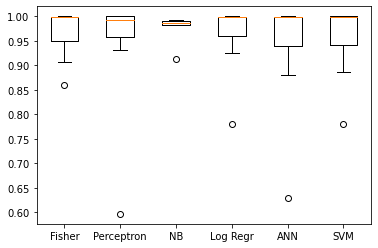

In [303]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['test_score'],per_scores['test_score'],nb_scores['test_score'],lr_scores['test_score'],nn_scores['test_score'],svm_scores['test_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
#plot.ylim([0.9,1.01])
plot.show()


### Training Accuracies 

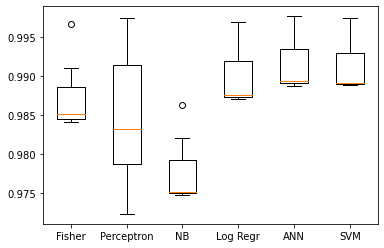

In [282]:
fig, ax = plot.subplots()
ax.boxplot([fda_scores['train_score'],per_scores['train_score'],nb_scores['train_score'],lr_scores['train_score'],nn_scores['train_score'],svm_scores['train_score']])
ax.set_xticklabels(['Fisher','Perceptron','NB','Log Regr','ANN','SVM'])
plot.show()